## Objective

Analyze year over year (YoY) change in spending in actual budget data in the last five (5) fiscal years (FY),FY 18-23, in administrative, instructional, and support services.

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#importing acual budget data
fy18_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 18 Actual Budget Data.csv",parse_dates = ['FY'])
fy19_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 19 Actual Budget Data.csv",parse_dates = ['FY'])
fy20_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 20 Actual Budget Data .csv",parse_dates = ['FY'])
fy21_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 21 Actual Budget Data.csv",parse_dates = ['FY'])
fy22_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 22 Actual Budget Data.csv",parse_dates = ['FY'])
fy23_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 23 Actual Budget Data.csv",parse_dates = ['FY'])

In [19]:
# fy18_agg = fy18_actual.groupby(['FY','Category'])['Actuals'].sum()

# fy18_agg

FY          Category        
2018-06-30  Administrative      4971101.45
            Instruction         5605601.13
            Support Services    1798848.08
Name: Actuals, dtype: float64

In [27]:
# Aggregated metrics for Actual budget data FY 18-23 
fy18_agg = fy18_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy18_agg_df = pd.DataFrame(fy18_agg)

fy19_agg = fy19_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy19_agg_df = pd.DataFrame(fy19_agg)

fy20_agg = fy20_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy20_agg_df = pd.DataFrame(fy20_agg)

fy21_agg = fy21_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy21_agg_df = pd.DataFrame(fy21_agg)

fy22_agg = fy22_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy22_agg_df = pd.DataFrame(fy22_agg)

fy23_agg = fy23_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy23_agg_df = pd.DataFrame(fy23_agg)

#Concating all dataframes into a single dataframe
actual_budget_data = pd.concat([fy18_agg_df,fy19_agg_df,fy20_agg_df,fy21_agg_df,fy22_agg_df,fy23_agg_df])

#Setting index of newly formed df
actual_budget_data.set_index('FY',inplace = True)

In [58]:
#subsetting dataframe into three distinct categories
actual_administrative_df = actual_budget_data[actual_budget_data['Category'] == 'Administrative']
actual_instruction_df = actual_budget_data[actual_budget_data['Category'] == 'Instruction']
actual_sup_ser_df = actual_budget_data[actual_budget_data['Category'] == 'Support Services']

#YoY Metrics Administrative
actual_administrative_df['YoY_Change'] = actual_administrative_df['Actuals'].diff().fillna(0)
actual_administrative_df['YoY_Change_Pct'] = round(actual_administrative_df['Actuals'].pct_change(),2).fillna(0)

#YoY Metrics Instructional
actual_instruction_df['YoY_Change'] = actual_instruction_df['Actuals'].diff().fillna(0)
actual_instruction_df['YoY_Change_Pct'] = round(actual_instruction_df['Actuals'].pct_change(),2).fillna(0)

#YoY Metrics Support Services
actual_sup_ser_df['YoY_Change'] = actual_sup_ser_df['Actuals'].diff().fillna(0)
actual_sup_ser_df['YoY_Change_Pct'] = round(actual_sup_ser_df['Actuals'].pct_change(),2).fillna(0)

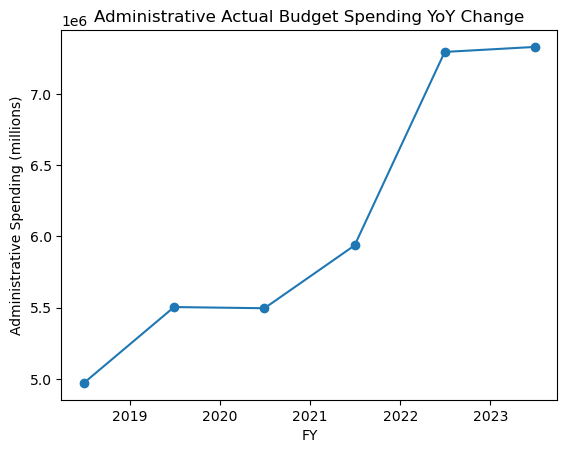

In [46]:
#Actuals Administrative Visualization
plt.plot(actual_administrative_df['Actuals'],marker = 'o',)
plt.ylabel('Administrative Spending (millions)')
plt.xlabel('FY')
plt.title('Administrative Actual Budget Spending YoY Change')
plt.show()

In [52]:
actual_administrative_df[['YoY_Change', 'YoY_Change_Pct']].mean()

YoY_Change        393246.96
YoY_Change_Pct         0.07
dtype: float64

### Administrative Actual Budget Spending 

On average there is an 393246.96, 7%, increase YoY in administrative spending. The largest increase in administrative spending was from FY 21 to FY 22, a 1358722.18, 23%, increase in YoY spending.

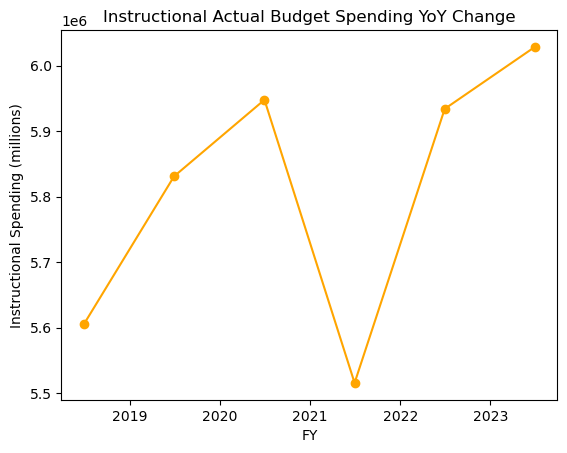

In [53]:
#Actuals Instructional Visualization
plt.plot( actual_instruction_df['Actuals'],marker = 'o',color = 'orange')
plt.ylabel('Instructional Spending (millions)')
plt.xlabel('FY')
plt.title('Instructional Actual Budget Spending YoY Change')
plt.show()

In [54]:
actual_instruction_df[['YoY_Change', 'YoY_Change_Pct']].mean()

YoY_Change        70459.485
YoY_Change_Pct        0.015
dtype: float64

### Instructional Actual Budget Spending 

On average there is an increase of approximatey 70459.49, 2%, in YoY on instructional spending.The largest increase in instructional spending was from FY 21 to FY 22, an increase of 417992.88, 8%, YoY spending 	

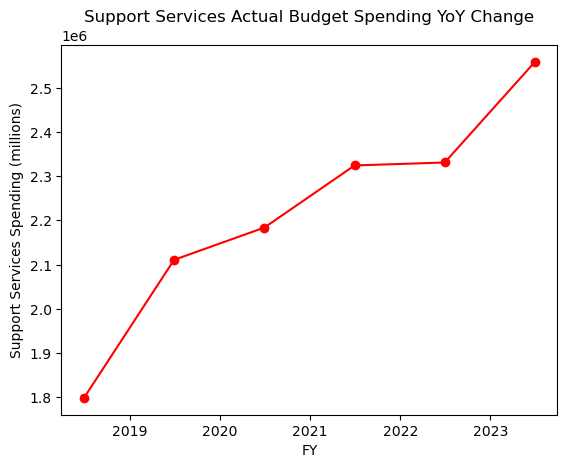

In [55]:
#Actuals Support Services Visualization
plt.plot(actual_sup_ser_df['Actuals'],marker = 'o',color = 'red')
plt.ylabel('Support Services Spending (millions)')
plt.xlabel('FY')
plt.title('Support Services Actual Budget Spending YoY Change')
plt.show()

In [56]:
actual_sup_ser_df[['YoY_Change', 'YoY_Change_Pct']].mean()

YoY_Change        126614.548333
YoY_Change_Pct         0.060000
dtype: float64

### Support Services Actual Budget Spending 

On average, there is an increase of approximately 126614.55, 6%, in YoY spending on support services. The largest increase in support services spending was from the FY 22 to FY 23, an increase of 227386.30, 10%, YoY spending.

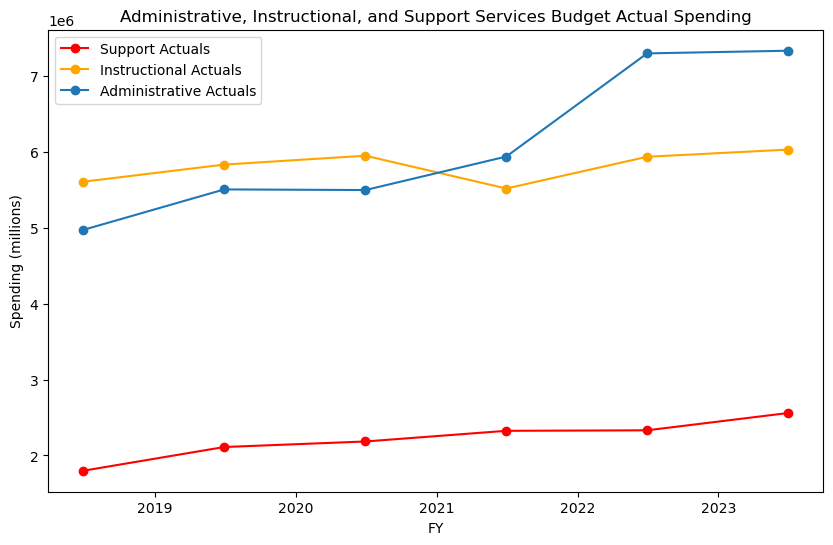

In [57]:
#Setting plot size
plt.figure(figsize=(10,6))

#Plotting all three subcateogires on the same plot
plt.plot(actual_sup_ser_df['Actuals'],marker = 'o',color = 'red', label = 'Support Actuals')
plt.plot(actual_instruction_df['Actuals'],marker = 'o',color = 'orange', label = 'Instructional Actuals')
plt.plot(actual_administrative_df['Actuals'],marker = 'o', label = 'Administrative Actuals')

#labels
plt.xlabel('FY')
plt.ylabel('Spending (millions)')
plt.title('Administrative, Instructional, and Support Services Budget Actual Spending')

#Creating legend for subcategories
plt.legend()

plt.show()

## Conclusion 

#### Support Services Actual Budget Spending 
On average, there is an increase of approximately 126614.55, 6%, in YoY spending on support services. The largest increase in support services spending was from the FY 22 to FY 23, an increase of 227386.30, 10%, YoY spending.

#### Instructional Actual Budget Spending 
On average there is an increase of approximatey 70459.49, 2%, in YoY on instructional spending.The largest increase in instructional spending was from FY 21 to FY 22, an increase of 417992.88, 8%, YoY spending 	

#### Support Services Actual Budget Spending 
On average, there is an increase of approximately 126614.55, 6%, in YoY spending on support services. The largest increase in support services spending was from the FY 22 to FY 23, an increase of 227386.30, 10%, YoY spending.
